In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [320]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [321]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [322]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370649 entries, 0 to 1370648
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1370649 non-null  int64  
 1   kWh       1370649 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 20.9 MB


In [323]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1370644    0.18
1370645    0.18
1370646    0.18
1370647    0.18
1370648    0.18
Name: kWh, Length: 1370649, dtype: float64

In [324]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1370644    0.18
1370645    0.18
1370646    0.18
1370647    0.18
1370648    0.18
Name: kWh, Length: 1370649, dtype: float64

In [325]:
l=len(conso_data)-1
l

1370648

In [326]:
conso_data['sec']=conso_data['Interval']/1000


In [327]:
conso_data['Wh']=3600000/conso_data['Interval']


In [328]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [329]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370649 entries, 0 to 1370648
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1370649 non-null  int64  
 1   kWh        1370649 non-null  float64
 2   sec        1370649 non-null  float64
 3   Wh         1370649 non-null  float64
 4   cumul(ms)  1370649 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 52.3 MB


In [330]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1370644,19674,0.18,19.674,182.982617,32240939496
1370645,19538,0.18,19.538,184.256321,32240959034
1370646,19637,0.18,19.637,183.327392,32240978671
1370647,19580,0.18,19.580,183.861083,32240998251
1370648,19493,0.18,19.493,184.681681,32241017744


In [331]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

32241017744000

In [332]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 18, 13, 102420)

In [333]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [334]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [335]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [336]:
conso_data['dates']

0         2023-08-21 19:18:35.036420
1         2023-08-21 19:18:56.894420
2         2023-08-21 19:19:18.895420
3         2023-08-21 19:19:40.823420
4         2023-08-21 19:20:02.714420
                     ...            
1370644   2024-08-28 23:07:12.598420
1370645   2024-08-28 23:07:32.136420
1370646   2024-08-28 23:07:51.773420
1370647   2024-08-28 23:08:11.353420
1370648   2024-08-28 23:08:30.846420
Name: dates, Length: 1370649, dtype: datetime64[ns]

In [337]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:18:35.036420,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:18:56.894420,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:19:18.895420,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:19:40.823420,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:20:02.714420,21/08/23
...,...,...,...,...,...,...,...
1370644,19674,0.18,19.674,182.982617,32240939496,2024-08-28 23:07:12.598420,28/08/24
1370645,19538,0.18,19.538,184.256321,32240959034,2024-08-28 23:07:32.136420,28/08/24
1370646,19637,0.18,19.637,183.327392,32240978671,2024-08-28 23:07:51.773420,28/08/24
1370647,19580,0.18,19.580,183.861083,32240998251,2024-08-28 23:08:11.353420,28/08/24


In [338]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('28/08/24', 28, 8, 2024)

In [339]:
here = now.strftime('%H:%M:%S')
here

'23:08:58'

In [340]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [341]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3725 entries, 1366924 to 1370648
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3725 non-null   int64         
 1   kWh        3725 non-null   float64       
 2   sec        3725 non-null   float64       
 3   Wh         3725 non-null   float64       
 4   cumul(ms)  3725 non-null   int64         
 5   dates      3725 non-null   datetime64[ns]
 6   days       3725 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 232.8+ KB


In [342]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [343]:
data = list(df_grp['kWh'])
print(data)


[0.81, 3.7, 4.224, 3.68, 4.185, 4.593, 3.535, 3.425, 3.513, 3.69, 3.744, 3.822, 4.251, 3.783, 3.493, 3.631, 3.324, 3.384, 4.272, 4.009, 4.043, 3.934, 3.45, 4.438, 3.76, 3.761, 4.309, 4.714, 3.829, 3.224, 3.177, 3.985, 3.688, 3.153, 3.784, 4.136, 3.775, 3.581, 4.764, 4.201, 4.533, 3.779, 3.41, 4.307, 3.879, 3.853, 3.444, 4.078, 3.659, 3.399, 4.14, 3.383, 3.879, 3.837, 3.637, 3.759, 4.249, 3.296, 3.877, 2.991, 2.055, 2.042, 2.442, 4.084, 3.721, 4.327, 3.614, 3.931, 3.741, 3.896, 4.006, 4.108, 3.659, 3.153, 3.804, 3.507, 3.628, 3.667, 3.72, 3.249, 3.86, 3.251, 3.796, 3.613, 4.076, 3.564, 3.387, 3.816, 4.061, 4.332, 4.136, 3.998, 4.238, 3.741, 3.929, 3.858, 3.916, 3.734, 4.053, 4.346, 3.886, 3.504, 3.683, 3.667, 3.348, 3.842, 4.004, 4.101, 3.478, 4.174, 3.599, 4.058, 4.553, 3.676, 3.439, 3.579, 4.147, 3.704, 4.094, 3.98, 3.746, 3.591, 5.124, 3.704, 3.765, 4.284, 4.111, 4.687, 4.41, 4.002, 3.758, 4.309, 4.746, 4.185, 4.795, 4.313, 3.733, 4.169, 3.698, 3.665, 3.531, 3.928, 3.687, 3.784, 3.58

In [344]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [345]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [346]:
len(df)

1950

In [347]:
period(p=2)

2024-08-28 07:35:43.490304	2024-08-28 12:59:20.520304	5h 23m 37s 	950


In [348]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.304252
dtype: float64

In [349]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.664837
dtype: float64

In [350]:
last=df_grp.iloc[-1]['kWh']
last

3.725

In [351]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3725 entries, 1366924 to 1370648
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3725 non-null   int64         
 1   kWh        3725 non-null   float64       
 2   sec        3725 non-null   float64       
 3   Wh         3725 non-null   float64       
 4   cumul(ms)  3725 non-null   int64         
 5   dates      3725 non-null   datetime64[ns]
 6   days       3725 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 232.8+ KB


In [352]:
# select day
day = today
#day = '16/08/24'


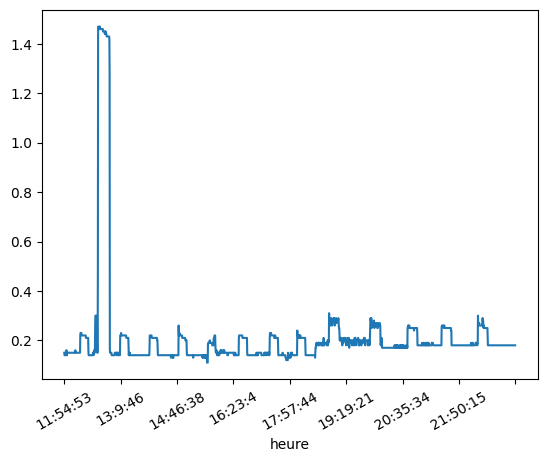

In [353]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [354]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:18:35.036420,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:18:56.894420,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:19:18.895420,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:19:40.823420,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:20:02.714420,21/08/23
...,...,...,...,...,...,...,...
1370644,19674,0.18,19.674,182.982617,32240939496,2024-08-28 23:07:12.598420,28/08/24
1370645,19538,0.18,19.538,184.256321,32240959034,2024-08-28 23:07:32.136420,28/08/24
1370646,19637,0.18,19.637,183.327392,32240978671,2024-08-28 23:07:51.773420,28/08/24
1370647,19580,0.18,19.580,183.861083,32240998251,2024-08-28 23:08:11.353420,28/08/24


In [355]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:15,26802,0.13,26.802,134.318334,32157722734,2024-08-28 00:00:15.836420,28/08/24
0:0:40,25058,0.14,25.058,143.666693,32157747792,2024-08-28 00:00:40.894420,28/08/24
0:1:5,25031,0.14,25.031,143.821661,32157772823,2024-08-28 00:01:05.925420,28/08/24
0:1:30,25004,0.14,25.004,143.976964,32157797827,2024-08-28 00:01:30.929420,28/08/24
0:1:56,25693,0.14,25.693,140.115985,32157823520,2024-08-28 00:01:56.622420,28/08/24
...,...,...,...,...,...,...,...
23:7:12,19674,0.18,19.674,182.982617,32240939496,2024-08-28 23:07:12.598420,28/08/24
23:7:32,19538,0.18,19.538,184.256321,32240959034,2024-08-28 23:07:32.136420,28/08/24
23:7:51,19637,0.18,19.637,183.327392,32240978671,2024-08-28 23:07:51.773420,28/08/24


In [356]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 12/08/24 4.378
Min : 02/08/24 3.034


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1366924,26802,0.13,26.802,134.318334,32157722734,2024-08-28 00:00:15.836420,28/08/24,0:0:15
1366925,25058,0.14,25.058,143.666693,32157747792,2024-08-28 00:00:40.894420,28/08/24,0:0:40
1366926,25031,0.14,25.031,143.821661,32157772823,2024-08-28 00:01:05.925420,28/08/24,0:1:5
1366927,25004,0.14,25.004,143.976964,32157797827,2024-08-28 00:01:30.929420,28/08/24,0:1:30
1366928,25693,0.14,25.693,140.115985,32157823520,2024-08-28 00:01:56.622420,28/08/24,0:1:56
...,...,...,...,...,...,...,...,...
1370644,19674,0.18,19.674,182.982617,32240939496,2024-08-28 23:07:12.598420,28/08/24,23:7:12
1370645,19538,0.18,19.538,184.256321,32240959034,2024-08-28 23:07:32.136420,28/08/24,23:7:32
1370646,19637,0.18,19.637,183.327392,32240978671,2024-08-28 23:07:51.773420,28/08/24,23:7:51
1370647,19580,0.18,19.580,183.861083,32240998251,2024-08-28 23:08:11.353420,28/08/24,23:8:11


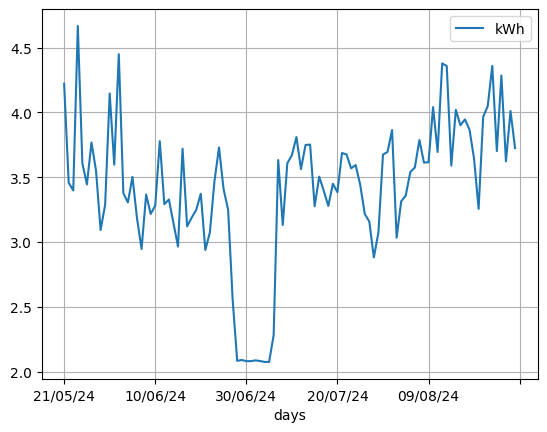

In [357]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-08-28 00:00:15.836420	2024-08-28 07:35:57.986420	7h 35m 42s 	1000
2024-08-28 07:35:57.986420	2024-08-28 13:16:22.124420	5h 40m 24s 	2000
2024-08-28 13:16:22.124420	2024-08-28 19:26:43.702420	6h 10m 21s 	3000
2024-08-28 19:26:43.702420	2024-08-28 23:08:30.846420	3h 41m 47s 	725
<class 'pandas.core.frame.DataFrame'>
Index: 3725 entries, 1366924 to 1370648
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3725 non-null   int64         
 1   kWh        3725 non-null   float64       
 2   sec        3725 non-null   float64       
 3   Wh         3725 non-null   float64       
 4   cumul(ms)  3725 non-null   int64         
 5   dates      3725 non-null   datetime64[ns]
 6   days       3725 non-null   object        
 7   heure      3725 non-null   object        
 8   hours      3725 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 291.0+ KB


('28/08/24', <Axes: xlabel='hours'>)

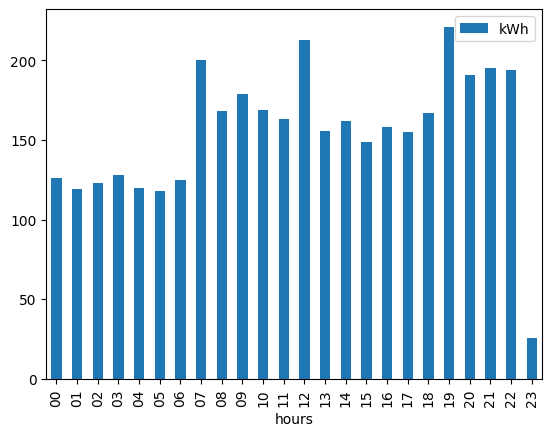

In [358]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [359]:
df_grp

,kWh
days,
21/08/23,0.810
22/08/23,3.700
23/08/23,4.224
24/08/23,3.680
25/08/23,4.185
...,...
24/08/24,3.702
25/08/24,4.285
26/08/24,3.622


In [360]:
# select number of days to display
span = 30
#df_grp.tail(span)


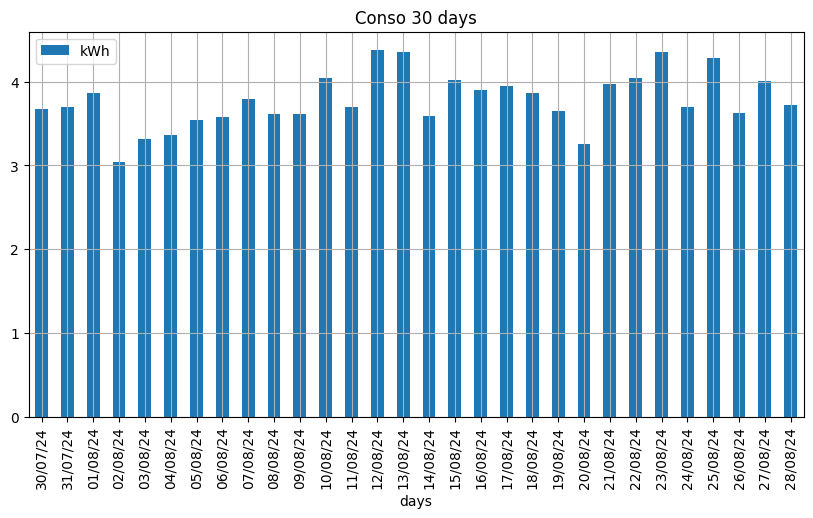

In [361]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


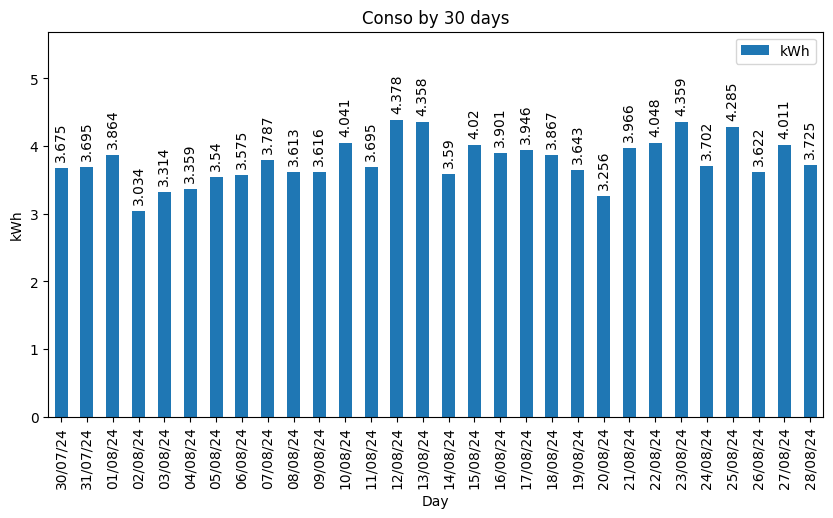

In [362]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [363]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
30/07/24    3.675
31/07/24    3.695
01/08/24    3.864
02/08/24    3.034
03/08/24    3.314
04/08/24    3.359
05/08/24    3.540
06/08/24    3.575
07/08/24    3.787
08/08/24    3.613
09/08/24    3.616
10/08/24    4.041
11/08/24    3.695
12/08/24    4.378
13/08/24    4.358
14/08/24    3.590
15/08/24    4.020
16/08/24    3.901
17/08/24    3.946
18/08/24    3.867
19/08/24    3.643
20/08/24    3.256
21/08/24    3.966
22/08/24    4.048
23/08/24    4.359
24/08/24    3.702
25/08/24    4.285
26/08/24    3.622
27/08/24    4.011
28/08/24    3.725
Name: kWh, dtype: float64

In [364]:
x_labels=df_grp.tail(span).index
x_labels

Index(['30/07/24', '31/07/24', '01/08/24', '02/08/24', '03/08/24', '04/08/24',
       '05/08/24', '06/08/24', '07/08/24', '08/08/24', '09/08/24', '10/08/24',
       '11/08/24', '12/08/24', '13/08/24', '14/08/24', '15/08/24', '16/08/24',
       '17/08/24', '18/08/24', '19/08/24', '20/08/24', '21/08/24', '22/08/24',
       '23/08/24', '24/08/24', '25/08/24', '26/08/24', '27/08/24', '28/08/24'],
      dtype='object', name='days')

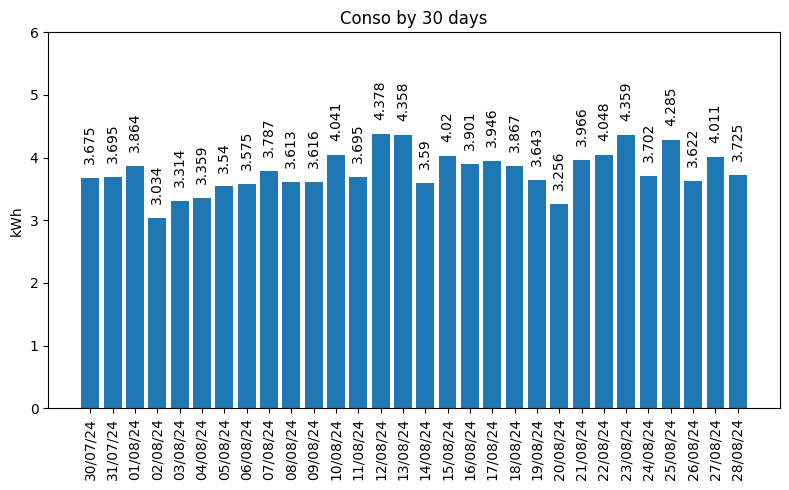

In [365]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [366]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

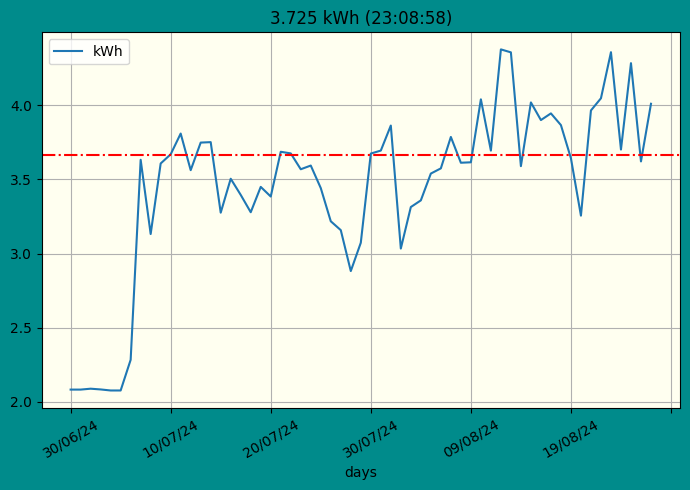

In [367]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

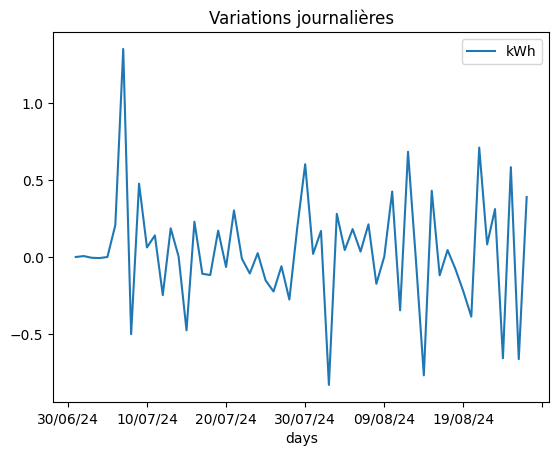

In [368]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [369]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:18:35.036420,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:18:56.894420,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:19:18.895420,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:19:40.823420,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:20:02.714420,21/08/23,19
...,...,...,...,...,...,...,...,...
1370644,19674,0.18,19.674,182.982617,32240939496,2024-08-28 23:07:12.598420,28/08/24,23
1370645,19538,0.18,19.538,184.256321,32240959034,2024-08-28 23:07:32.136420,28/08/24,23
1370646,19637,0.18,19.637,183.327392,32240978671,2024-08-28 23:07:51.773420,28/08/24,23
1370647,19580,0.18,19.580,183.861083,32240998251,2024-08-28 23:08:11.353420,28/08/24,23


In [370]:

# group all by day for all conso_days
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
groupallbyday.tail()


,days,hours,kWh
124,21/08/23,19,0.16
125,21/08/23,19,0.16
126,21/08/23,19,0.16
127,21/08/23,19,0.16
128,21/08/23,19,0.16
...,...,...,...
1370644,28/08/24,23,0.18
1370645,28/08/24,23,0.18
1370646,28/08/24,23,0.18
1370647,28/08/24,23,0.18


In [371]:
grp_by_day = groupallbyday.count()
grp_by_day

kWh
days     hours     
21/08/23 19     129
         20     279
         21     142
         22     130
         23     130
...             ...
28/08/24 19     221
         20     191
         21     195
         22     194
         23      26

[8957 rows x 1 columns]

In [372]:
grp_by_day['cumsum'] = grp_by_day.groupby(level=0)['kWh'].cumsum()
grp_by_day['diff'] = grp_by_day.groupby(level=0)['kWh'].diff()
# or
grp_by_day['cumsum'] = grp_by_day.groupby(['days'])['kWh'].cumsum()
grp_by_day['diff'] = grp_by_day.groupby(['days'])['kWh'].diff()
grp_by_day

kWh  cumsum   diff
days     hours                    
21/08/23 19     129     129    NaN
         20     279     408  150.0
         21     142     550 -137.0
         22     130     680  -12.0
         23     130     810    0.0
...             ...     ...    ...
28/08/24 19     221    3119   54.0
         20     191    3310  -30.0
         21     195    3505    4.0
         22     194    3699   -1.0
         23      26    3725 -168.0

[8957 rows x 3 columns]

Text(0.5, 1.0, 'Cumul journalier')

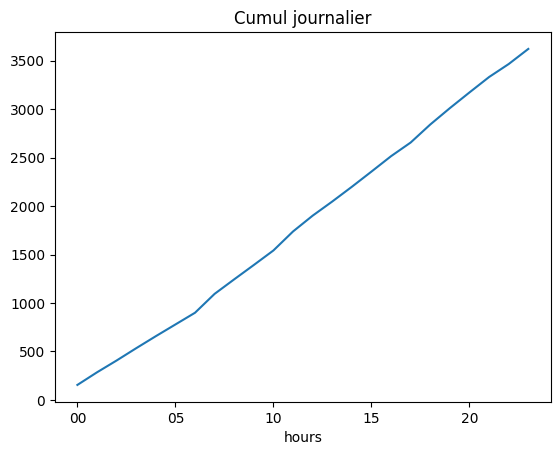

In [373]:
# progression sans surprise
grp_by_day.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

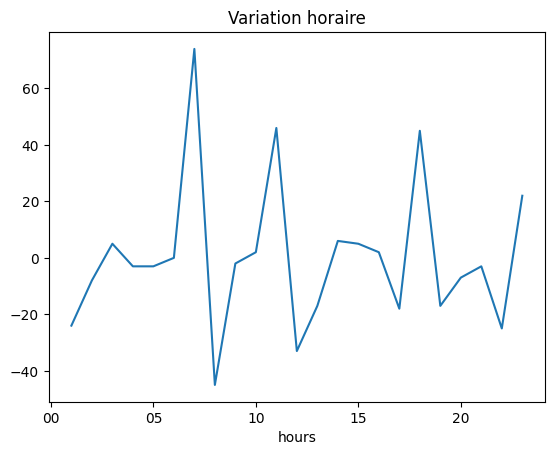

In [374]:
# plus parlant
grp_by_day.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [375]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_day.index.levels[0].unique())
# or
n = len(grp_by_day.index.levels[0])
# or
n = grp_by_day.index.levshape[0]  # levshape -> (371,24)
n

374

Text(0.5, 1.0, '374 days')

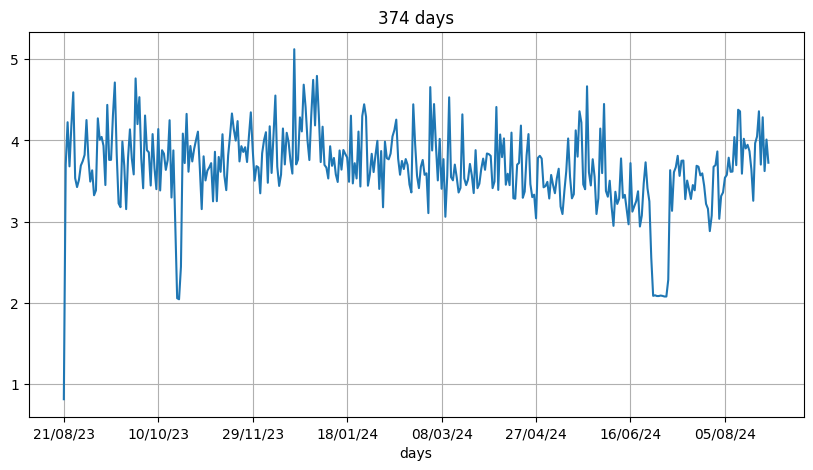

In [376]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '28/08/24')

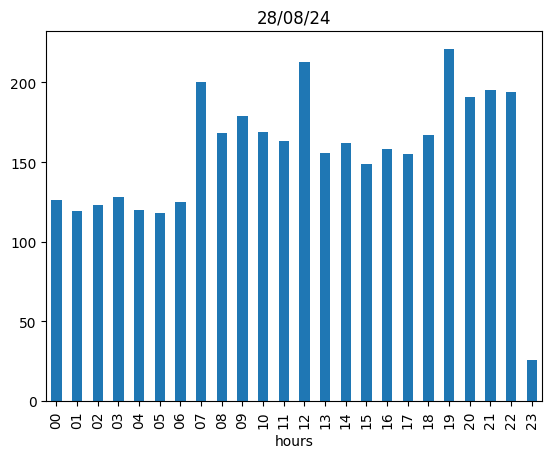

In [377]:
# select a day to plot
day = '02/07/24'
day = today
grp_by_day.loc[day]['kWh'].plot.bar()
plt.title(f'{day}')

# Conso du jour


In [378]:
groupedbyhour.count()

,kWh
hours,
00,126
01,119
02,123
03,128
04,120
05,118
06,125
07,200
08,168


In [379]:
day = '26/08/24'
day = today
grp_by_day.loc[day].kWh

hours
00    126
01    119
02    123
03    128
04    120
05    118
06    125
07    200
08    168
09    179
10    169
11    163
12    213
13    156
14    162
15    149
16    158
17    155
18    167
19    221
20    191
21    195
22    194
23     26
Name: kWh, dtype: int64

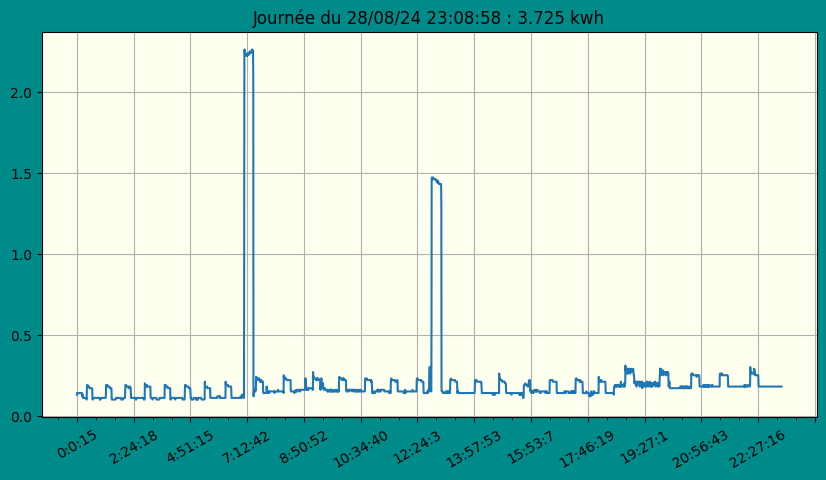

In [380]:

show(day,bgcolor='ivory')


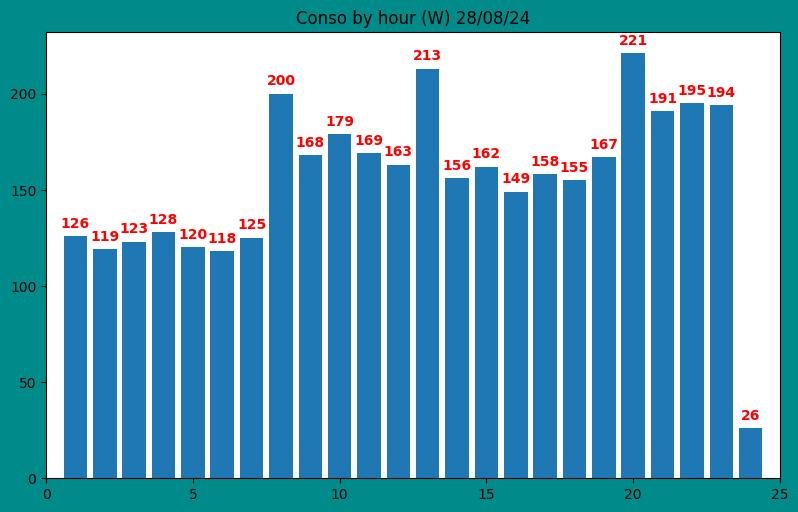

In [381]:
# conso by hour
#data = groupedbyhour.count().kWh
data = grp_by_day.loc[day].kWh

# len(groupedbyhour)
x = np.arange(1,len(data)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
#plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {today}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [382]:
diff = grp_by_day.loc[day]
diff

,kWh,cumsum,diff
hours,,,
00,126,126,NaN
01,119,245,-7.0
02,123,368,4.0
03,128,496,5.0
04,120,616,-8.0
05,118,734,-2.0
06,125,859,7.0
07,200,1059,75.0
08,168,1227,-32.0


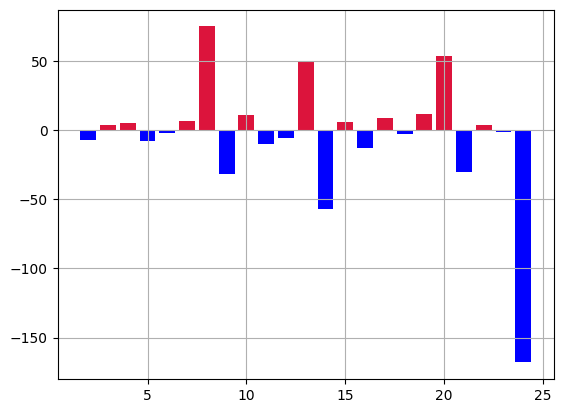

In [383]:
xx = np.arange(1,len(diff)+1)
plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

<Axes: xlabel='hours'>

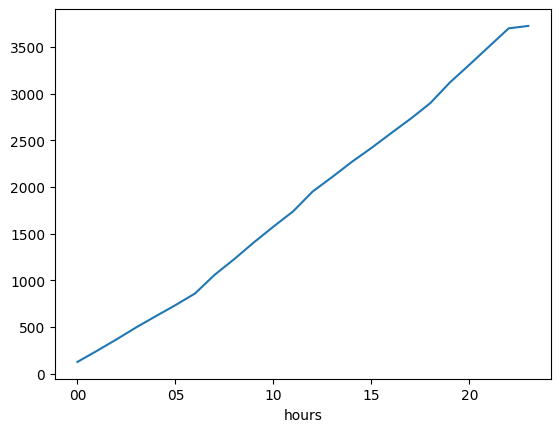

In [384]:
data.cumsum().plot()

In [385]:
data.diff()

hours
00      NaN
01     -7.0
02      4.0
03      5.0
04     -8.0
05     -2.0
06      7.0
07     75.0
08    -32.0
09     11.0
10    -10.0
11     -6.0
12     50.0
13    -57.0
14      6.0
15    -13.0
16      9.0
17     -3.0
18     12.0
19     54.0
20    -30.0
21      4.0
22     -1.0
23   -168.0
Name: kWh, dtype: float64

<Axes: xlabel='hours'>

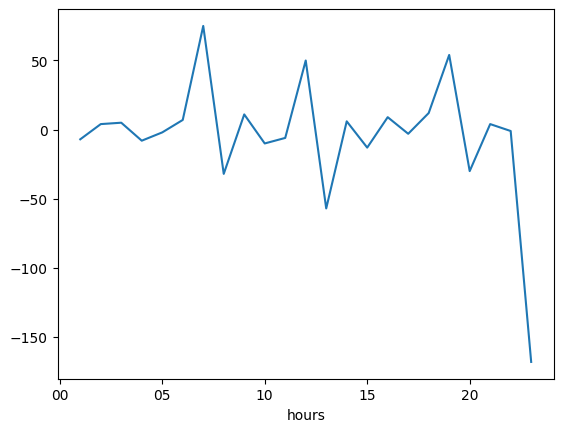

In [386]:
data.diff().plot()

# Test

In [387]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_for

In [388]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [389]:
#conso_byhour(day)

In [390]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

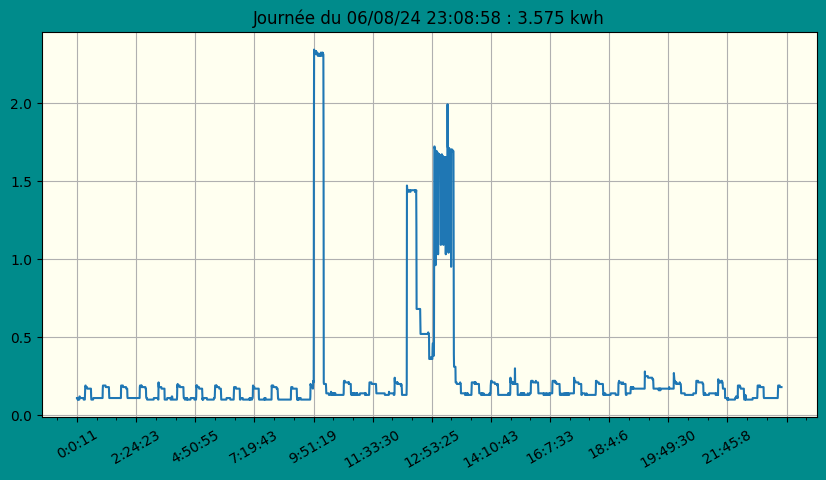

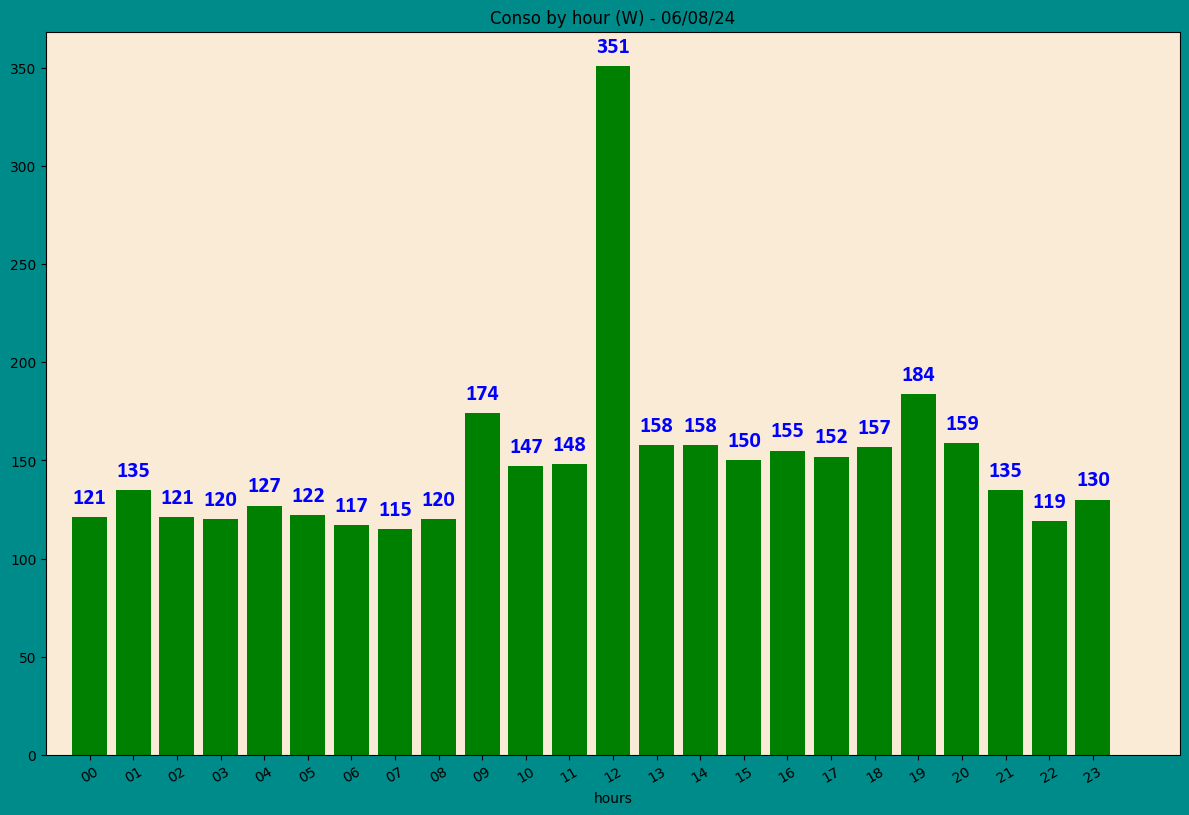

In [391]:
# plot any day
day = '06/08/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

<Axes: xlabel='days'>

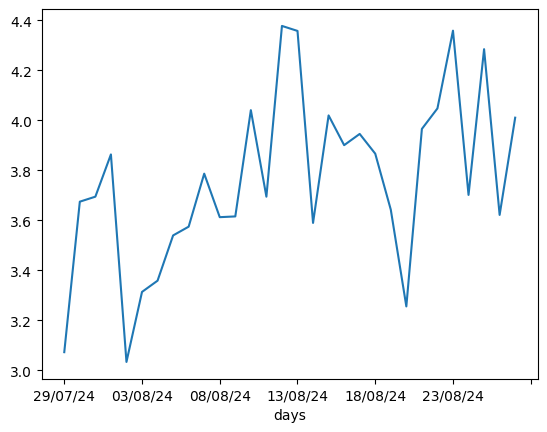

In [392]:
month.plot()


In [393]:
month

days
29/07/24    3.073
30/07/24    3.675
31/07/24    3.695
01/08/24    3.864
02/08/24    3.034
03/08/24    3.314
04/08/24    3.359
05/08/24    3.540
06/08/24    3.575
07/08/24    3.787
08/08/24    3.613
09/08/24    3.616
10/08/24    4.041
11/08/24    3.695
12/08/24    4.378
13/08/24    4.358
14/08/24    3.590
15/08/24    4.020
16/08/24    3.901
17/08/24    3.946
18/08/24    3.867
19/08/24    3.643
20/08/24    3.256
21/08/24    3.966
22/08/24    4.048
23/08/24    4.359
24/08/24    3.702
25/08/24    4.285
26/08/24    3.622
27/08/24    4.011
Name: kWh, dtype: float64

In [394]:
month

days
29/07/24    3.073
30/07/24    3.675
31/07/24    3.695
01/08/24    3.864
02/08/24    3.034
03/08/24    3.314
04/08/24    3.359
05/08/24    3.540
06/08/24    3.575
07/08/24    3.787
08/08/24    3.613
09/08/24    3.616
10/08/24    4.041
11/08/24    3.695
12/08/24    4.378
13/08/24    4.358
14/08/24    3.590
15/08/24    4.020
16/08/24    3.901
17/08/24    3.946
18/08/24    3.867
19/08/24    3.643
20/08/24    3.256
21/08/24    3.966
22/08/24    4.048
23/08/24    4.359
24/08/24    3.702
25/08/24    4.285
26/08/24    3.622
27/08/24    4.011
Name: kWh, dtype: float64

In [395]:
# date with max conso in 1 month
month.idxmax()

'12/08/24'

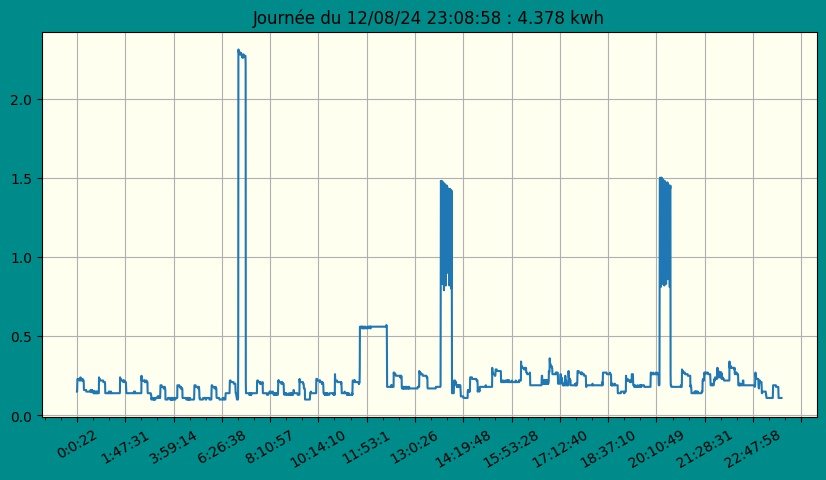

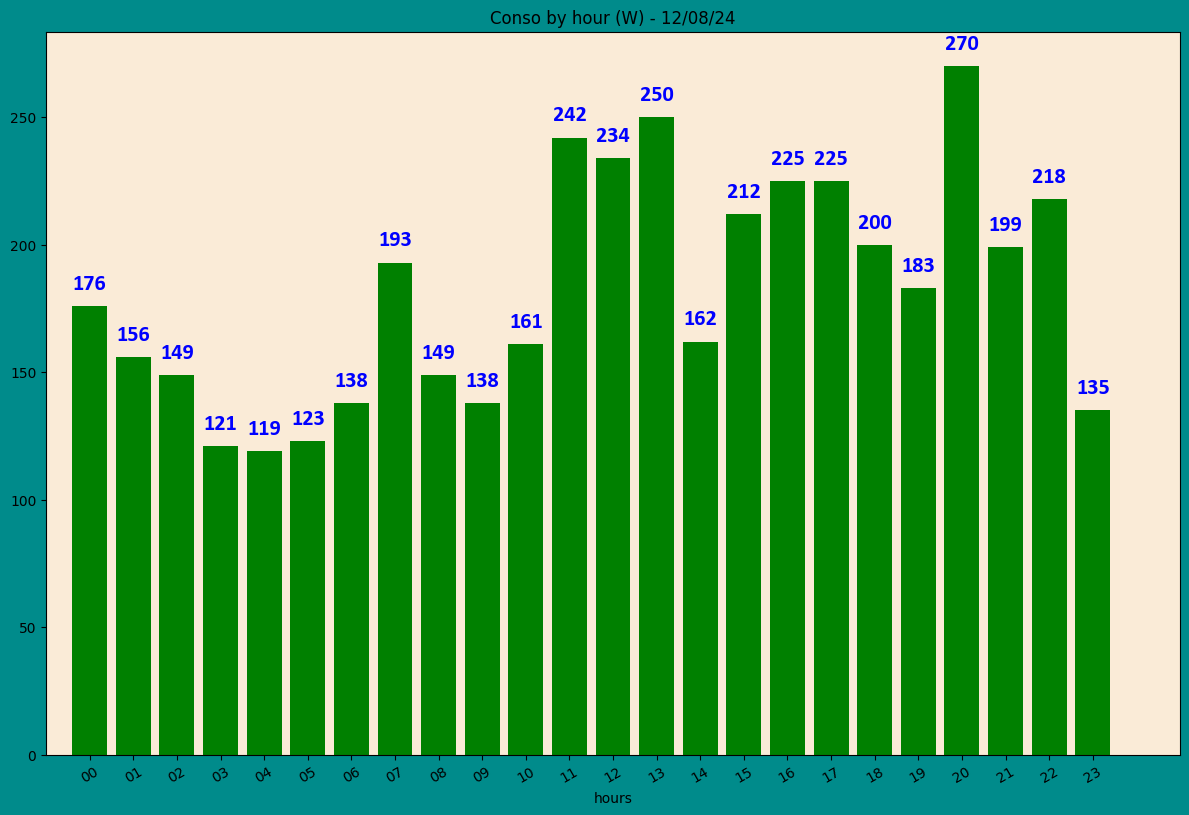

In [396]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [397]:
grp_by_day.loc[month.idxmax()].tail(7)

,kWh,cumsum,diff
hours,,,
17,225,3173,0.0
18,200,3373,-25.0
19,183,3556,-17.0
20,270,3826,87.0
21,199,4025,-71.0
22,218,4243,19.0
23,135,4378,-83.0


In [398]:
grp_by_day.columns

Index(['kWh', 'cumsum', 'diff'], dtype='object')

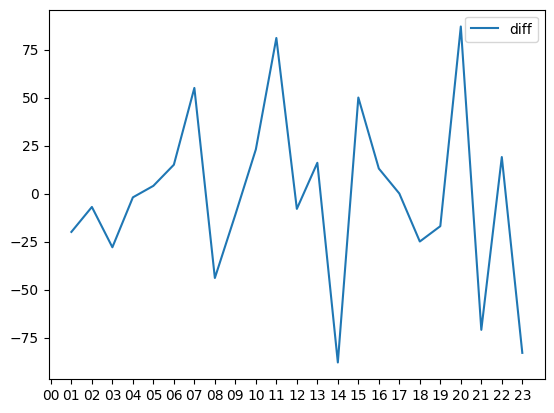

In [399]:
plt.plot(grp_by_day.loc[month.idxmax()]['diff'],label=grp_by_day.columns[2])
plt.legend()

In [400]:
# 41 s
filename='conso_data.csv'
#conso_data.to_csv(filename)